customizing data visualizations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# import data
recent_grads = pd.read_csv("recent-grads.csv")

# print out the first five rows of the dataset
print(recent_grads.head())

   Rank  Major_code                                      Major Major_category  \
0     1        2419                      PETROLEUM ENGINEERING    Engineering   
1     2        2416             MINING AND MINERAL ENGINEERING    Engineering   
2     3        2415                  METALLURGICAL ENGINEERING    Engineering   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING    Engineering   
4     5        2405                       CHEMICAL ENGINEERING    Engineering   

   Total  Sample_size    Men  Women  ShareWomen  Employed      ...        \
0   2339           36   2057    282    0.120564      1976      ...         
1    756            7    679     77    0.101852       640      ...         
2    856            3    725    131    0.153037       648      ...         
3   1258           16   1123    135    0.107313       758      ...         
4  32260          289  21239  11021    0.341631     25694      ...         

   Part_time  Full_time_year_round  Unemployed  Unemploy

In [2]:
# generate summary statistics for each column
print(recent_grads.describe())

             Rank   Major_code          Total  Sample_size            Men  \
count  173.000000   173.000000     173.000000   173.000000     173.000000   
mean    87.000000  3879.815029   39167.716763   356.080925   16637.358382   
std     50.084928  1687.753140   63354.613919   618.361022   28063.394844   
min      1.000000  1100.000000     124.000000     2.000000     119.000000   
25%     44.000000  2403.000000    4361.000000    39.000000    2110.000000   
50%     87.000000  3608.000000   15058.000000   130.000000    5347.000000   
75%    130.000000  5503.000000   38844.000000   338.000000   14440.000000   
max    173.000000  6403.000000  393735.000000  4212.000000  173809.000000   

               Women  ShareWomen       Employed      Full_time      Part_time  \
count     173.000000  173.000000     173.000000     173.000000     173.000000   
mean    22530.358382    0.522550   31192.763006   26029.306358    8832.398844   
std     40966.381219    0.230572   50675.002241   42869.655092 

/usr/local/lib/python3.4/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [3]:
# get rid of rows containing empty values, display how many rows were removed
row_number = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
print("Number of rows containing NaN values dropped: {}".format(
        row_number - recent_grads.shape[0]))

Number of rows containing NaN values dropped: 1


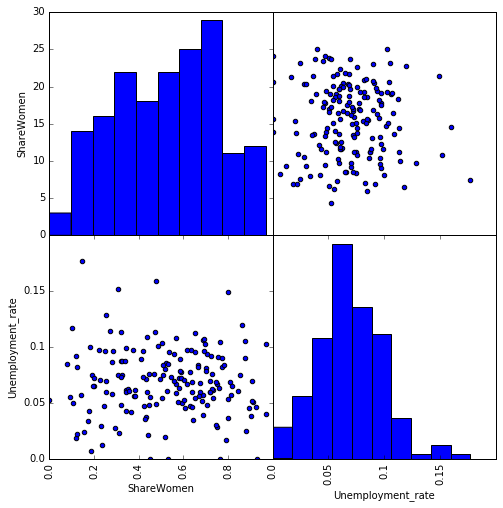

In [4]:
# create a customized scatter matrix plot, can also be obtained using the scatter_matrix
# function from pandas.tools.plotting
fig1 = plt.figure(figsize=(8, 8))
ax_topleft = fig1.add_subplot(2, 2, 1)
ax_topright = fig1.add_subplot(2, 2, 2)
ax_bottomleft = fig1.add_subplot(2, 2, 3)
ax_bottomright = fig1.add_subplot(2, 2, 4)

# histogram of the "ShareWomen" column in the top-left plot
ax_topleft.hist(recent_grads["ShareWomen"])
ax_topleft.get_xaxis().set_visible(False) # hide x-axis ticks
ax_topleft.set_ylabel("ShareWomen") # assign y-axis label
ax_topleft.set_ylim(0, 30) # set y-axis data limits
ax_topleft.set_yticklabels([0, 5, 10, 15, 20, 25, 30]) # set y-axis tick labels

# scatter plot using the "Unemployment_rate" as x-axis and "ShareWomen" as y-axis in the
# top-right plot
ax_topright.scatter(recent_grads["Unemployment_rate"], recent_grads["ShareWomen"])
ax_topright.get_xaxis().set_visible(False)
ax_topright.get_yaxis().set_visible(False) # hide y-axis ticks
ax_topright.set_xlim(0.0, 0.20) # set x-axis data limits

# scatter plot using the "ShareWomen" as x-axis and "Unemployment_rate" as y-axis in the
# bottom-left plot
ax_bottomleft.scatter(recent_grads["ShareWomen"], recent_grads["Unemployment_rate"])
ax_bottomleft.set_xlabel("ShareWomen") # assign x-axis label
ax_bottomleft.set_ylabel("Unemployment_rate")
ax_bottomleft.set_xlim(0.0, 1.0)
ax_bottomleft.set_xticklabels([0.0, 0.2, 0.4, 0.6, 0.8], rotation=90) # set and rotate x-axis tick labels
ax_bottomleft.set_ylim(0.0, 0.20) # set y-axis data limits
ax_bottomleft.set_yticklabels([0.00, 0.05, 0.10, 0.15])

# histogram of the "Unemployment_rate" column in the bottom-right plot
ax_bottomright.hist(recent_grads["Unemployment_rate"])
ax_bottomright.set_xlabel("Unemployment_rate")
ax_bottomright.get_yaxis().set_visible(False)
ax_bottomright.set_xlim(0.0, 0.20)
ax_bottomright.set_xticklabels([0.00, 0.05, 0.10, 0.15], rotation=90)

# remove vertical and horizontal spacing between subplots
fig1.subplots_adjust(wspace=0, hspace=0)

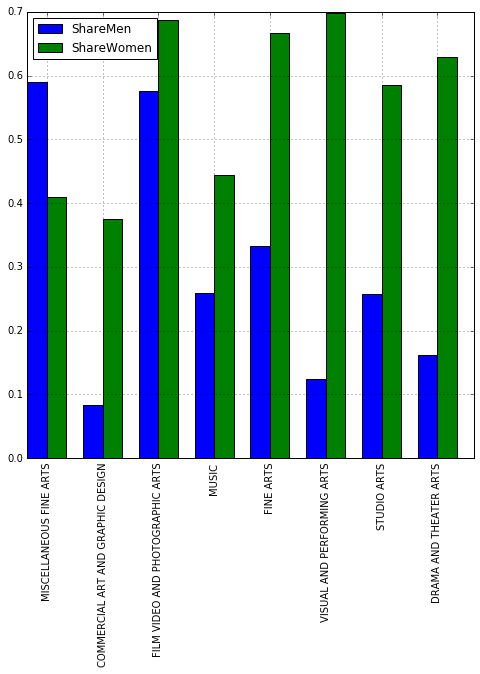

In [5]:
# create a new ShareMen column in the dataframe
recent_grads["ShareMen"] = recent_grads["Men"] / recent_grads["Total"]

# extract only the art majors from the complete dataframe
arts_grads = recent_grads[recent_grads["Major_category"] == "Arts"]

# create a grouped bar plot to compare the gender ratios in the arts majors
fig2 = plt.figure(figsize=(8, 8))
ax = fig2.add_subplot(1, 1, 1)

locs = np.arange(0, arts_grads.shape[0]) # list used for the placement of the first bar group
offset_locs = locs + 0.35 # placement of the second bar group

bar_1 = ax.bar(locs, arts_grads["ShareMen"].tolist(), width=0.35) # "ShareMen" bars
bar_2 = ax.bar(offset_locs, arts_grads["ShareWomen"].tolist(), width=0.35, color="green") # "ShareWomen" bars

ax.set_xticks(offset_locs) # align the x-axis labels between the two bars
ax.set_xticklabels(arts_grads["Major"].tolist(), rotation=90) # set x-axis tick labels
ax.legend((bar_1, bar_2), ("ShareMen", "ShareWomen"), loc="upper left") # create legend
ax.grid() # turn on background grid

further ideas:

- create a stacked bar plot of the gender ratios instead of a grouped one
- generate histograms from scratch without using the hist() method
- generate box plots only using matplotlib
- convert the code to reusable plotting functions
